# Pymaceuticals Data/ Statistical Analysis

### Dependancies.

In [9]:
# Key Dependancies 
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd
import scipy.stats as st
import numpy as np 
import os 
import csv

# Due to Darkmode of Jupyter Notebook
plt.style.use('dark_background')
mpl.rcParams["figure.facecolor"] = '1c2021'
mpl.rcParams["axes.facecolor"] = '1c2021'

# Version of MPL
print("Matplotlib version: ",mpl.__version__)

# Loading Data Files 
mouse_metadata_path = "data/mouse_metadata.csv"
study_results_path = "data/study_results.csv"

# Reading Files 
mouse_data = pd.read_csv(mouse_metadata_path)
study_data = pd.read_csv(study_results_path)

# Merging Data
comb_data=pd.merge(mouse_data,study_data, how="outer")
comb_data.head()


Matplotlib version:  3.5.1


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Preparing Data and Cleaning.

In [17]:
# Number of Unique Mice ID's (n unique)
total_mice=comb_data["Mouse ID"].nunique()
print(f'{total_mice} Mice were used in this study.')

# Duplicate Mice ID's with duplicate timepoints 
dup_mice = comb_data.loc[comb_data.duplicated(subset =["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice

# Obtaining data for duplicates
comb_data.loc[comb_data["Mouse ID"] =="g989",:]

# New DF removing Duplicate data
clean_data = comb_data[comb_data["Mouse ID"].isin(dup_mice)==False]
clean_data.head()


249 Mice were used in this study.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Validating Data is Clean
total_mice_clean=clean_data["Mouse ID"].nunique()
print(f'{total_mice_clean} Mice were used in this study.')

248 Mice were used in this study.


### Summary Statistics.

In [24]:
# Objective: Creating a stat table of mean, median, variance, stand dev and 
# SEM of tumor volume for each drug 

# Grouping by Drug 
drug_group = clean_data.groupby("Drug Regimen")
# Mean Tumour Volume
tumour_volume_mean = drug_group['Tumor Volume (mm3)'].mean()
# Median Tumour Volume
tumour_volume_median = drug_group['Tumor Volume (mm3)'].median()
# Variance of Tumour Volume
tumour_volume_vari = drug_group['Tumor Volume (mm3)'].var()
# Standard Deviation of Tumour Volume
tumour_volume_dev = drug_group['Tumor Volume (mm3)'].std()
# Unibiased SEM
tumour_volume_sem = drug_group['Tumor Volume (mm3)'].sem()

# Summary Table Data Frame
summary_stats=pd.DataFrame({ 
    'Mean': tumour_volume_mean,
    'Median' : tumour_volume_median,
    'Variance' : tumour_volume_vari,
    'Standard Deviation' : tumour_volume_dev,
    'Standard Error' : tumour_volume_sem})

# Format to 2dp and display
summary_stats.round(2)

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [28]:
drug_group['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Bar and Pie Charts.

<AxesSubplot:title={'center':'Total Num Timepoints for All Mice for each Drug'}, xlabel='Drug Regimen', ylabel='Total Number of Timepoints'>

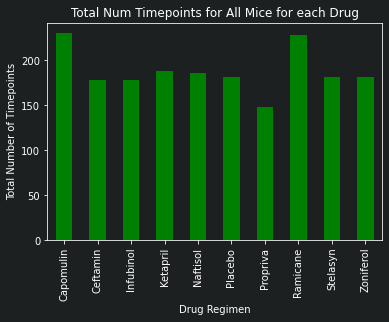

In [33]:
# Bar Plot using Dataframe method showing total timepoints for all mice
# Tested for each drug throughout the study 

drug_group.count()['Timepoint'].plot(kind = 'bar', ylabel = 'Total Number of Timepoints', title = 'Total Num Timepoints for All Mice for each Drug', color = 'green')


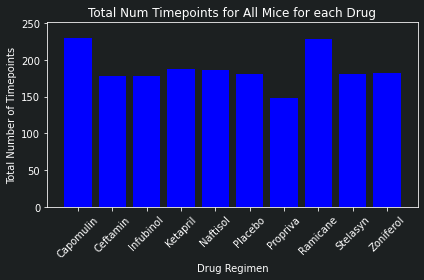

In [42]:
# Bar Plot using Pyplot method showing total timepoints for all mice
# Tested for each drug throughout the study 

# Creating bar chart and stating colour
plt.bar(drug_group.count()['Timepoint'].index, drug_group.count()['Timepoint'], color = 'b')

# Add title and labels for the chart
plt.title("Total Num Timepoints for All Mice for each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

# Changing angle of index values in x-axis to better represent data
plt.xticks([x for x in range(length)],drug_group.count()['Timepoint'].index,rotation = 45)

# Set the y limits of the current chart
plt.ylim(0, 251)
plt.yticks(np.arange(0,251, 50.0))
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Distribution of Female vs. Male'}, ylabel='Sex'>

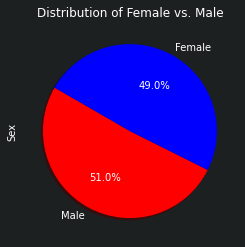

In [54]:
# Pie Plot using Pandas representing gender of mice

count_gender = clean_data['Sex'].value_counts()
count_gender.plot(kind = 'pie', title = 'Distribution of Female vs. Male', colors = ["red", "blue"], autopct='%1.1f%%', startangle = 150, shadow = True)


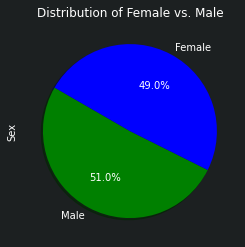

In [57]:
# Pie plot showing the distribution of female versus male mice using pyplot

# Generating Pie Chart
plt.pie(clean_data['Sex'].value_counts(), labels = clean_data['Sex'].unique(),  colors = ["green", "blue"],autopct='%1.1f%%', shadow = True, startangle = 150)



# Labelling Pie Chart
plt.title('Distribution of Female vs. Male')
plt.ylabel('Sex')
plt.show()